In [1]:
import pandas as pd 
from helpers import potus
import glob
import re
import os

importing helper functions


In [2]:

exp = 'potus_100t_600_10'
exp_folder = potus.rootFolder() + '/' + exp
exp_kld_files = exp_folder + '/' + 'speeches_dfr_*.pkl'

In [3]:
! ls '/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10'

bigrams.pkl
bow.pkl
lda.model
lda.model.expElogbeta.npy
lda.model.id2word
lda.model.state
speeches_df.pkl
speeches_dfr_potus_50t_600_10_klds_100_100.pkl
speeches_dfr_potus_50t_600_10_klds_125_125.pkl
speeches_dfr_potus_50t_600_10_klds_25_25.pkl
speeches_dfr_potus_50t_600_10_klds_50_50.pkl
speeches_dfr_potus_50t_600_10_klds_75_75.pkl
speeches_df_topics_probs.pkl
topic_probs.pkl
word_list.pkl


In [4]:
files = glob.glob(exp_kld_files)
display(files)

['/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_100t_600_10/speeches_dfr_potus_100t_600_10_klds_100_100.pkl',
 '/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_100t_600_10/speeches_dfr_potus_100t_600_10_klds_125_125.pkl',
 '/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_100t_600_10/speeches_dfr_potus_100t_600_10_klds_25_25.pkl',
 '/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_100t_600_10/speeches_dfr_potus_100t_600_10_klds_50_50.pkl',
 '/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_100t_600_10/speeches_dfr_potus_100t_600_10_klds_75_75.pkl']

In [5]:

m = re.findall('(\d+)', os.path.basename(files[2]) )
print(m)
topics, iterations, passes, Nw,Tw = m
print(f't: {topics}, Nw: {Nw}, Tw:{Tw}')

['100', '600', '10', '25', '25']
t: 100, Nw: 25, Tw:25


In [6]:
kld_settings = list()
df = pd.DataFrame()
for fn in files: 
    print(fn)
    m = re.findall('(\d+)', os.path.basename(fn))
    topics, iterations, passes, Nw,Tw = m
    print(f't: {topics}, Nw: {Nw}, Tw:{Tw}')
    kld_settings.append({
        'kld_filename': os.path.basename(fn), 
        'topics': int(topics), 
        'Nw': int(Nw), 
        'Tw': int(Tw), 
        'path': fn
    })
    
    dft = pd.read_pickle(fn)
    dft['kld_filename'] = os.path.basename(fn)
    print(len(dft))
    df = df.append(dft)
    
pd.DataFrame(kld_settings)

/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_100t_600_10/speeches_dfr_potus_100t_600_10_klds_100_100.pkl
t: 100, Nw: 100, Tw:100
962
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_100t_600_10/speeches_dfr_potus_100t_600_10_klds_125_125.pkl
t: 100, Nw: 125, Tw:125
962
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_100t_600_10/speeches_dfr_potus_100t_600_10_klds_25_25.pkl
t: 100, Nw: 25, Tw:25
962
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_100t_600_10/speeches_dfr_potus_100t_600_10_klds_50_50.pkl
t: 100, Nw: 50, Tw:50
962
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_100t_600_10/speeches_dfr_potus_100t_600_10_klds_75_75.pkl
t: 100, Nw: 75, Tw:75
962


,kld_filename,topics,Nw,Tw,path
0,speeches_dfr_potus_100t_600_10_klds_100_100.pkl,100,100,100,/home/azureuser/cloudfiles/code/data/processin...
1,speeches_dfr_potus_100t_600_10_klds_125_125.pkl,100,125,125,/home/azureuser/cloudfiles/code/data/processin...
2,speeches_dfr_potus_100t_600_10_klds_25_25.pkl,100,25,25,/home/azureuser/cloudfiles/code/data/processin...
3,speeches_dfr_potus_100t_600_10_klds_50_50.pkl,100,50,50,/home/azureuser/cloudfiles/code/data/processin...
4,speeches_dfr_potus_100t_600_10_klds_75_75.pkl,100,75,75,/home/azureuser/cloudfiles/code/data/processin...


In [7]:
df_before = pd.merge(df, pd.DataFrame(kld_settings), how='left', on='kld_filename', indicator=True)

In [8]:
df_before.kld_filename.value_counts()

speeches_dfr_potus_100t_600_10_klds_75_75.pkl      962
speeches_dfr_potus_100t_600_10_klds_50_50.pkl      962
speeches_dfr_potus_100t_600_10_klds_25_25.pkl      962
speeches_dfr_potus_100t_600_10_klds_100_100.pkl    962
speeches_dfr_potus_100t_600_10_klds_125_125.pkl    962
Name: kld_filename, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import matplotlib

#p = plt.hist2d(x=df2.novelty, y=df2.transience, bins=(120, 120), cmap=plt.cm.jet)



In [10]:
#p = plt.hist2d(x=df2.novelty, y=df2.resonance, bins=(120, 120), cmap=plt.cm.jet)

In [11]:
#df2.kld_filename.unique()
settings_df = pd.DataFrame(kld_settings).sort_values('Nw',ascending=False)

display(settings_df)

,kld_filename,topics,Nw,Tw,path
1,speeches_dfr_potus_100t_600_10_klds_125_125.pkl,100,125,125,/home/azureuser/cloudfiles/code/data/processin...
0,speeches_dfr_potus_100t_600_10_klds_100_100.pkl,100,100,100,/home/azureuser/cloudfiles/code/data/processin...
4,speeches_dfr_potus_100t_600_10_klds_75_75.pkl,100,75,75,/home/azureuser/cloudfiles/code/data/processin...
3,speeches_dfr_potus_100t_600_10_klds_50_50.pkl,100,50,50,/home/azureuser/cloudfiles/code/data/processin...
2,speeches_dfr_potus_100t_600_10_klds_25_25.pkl,100,25,25,/home/azureuser/cloudfiles/code/data/processin...



display(settings_df)
for idx, row in settings_df.iterrows():
    print(type(row))
    print(row.kld_filename)
    plot_df = df2.query(f'kld_filename == "{row.kld_filename}"')
    print(len(plot_df))
    print(row.Nw)
    
# color maps
from collections import OrderedDict
cmaps = OrderedDict()
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps
# https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py

for idx, row in settings_df.iterrows():
    
    plot_df = df2.query(f'kld_filename == "{row.kld_filename}"')
    # Set up the plot
      
    h = plt.hist2d(x=plot_df.novelty, y=plot_df.transience, bins=(100, 100), cmap=plt.get_cmap('cubehelix_r')) #, cmap=plt.cm.jet)
    plt.title(f'scale = {row.Nw}', size = 10)
    plt.xlabel('novelty')
    plt.ylabel('transience')
    y_lim = plt.ylim()
    x_lim = plt.xlim()
    plt.plot(x_lim, y_lim, '-', color = 'lightgrey')
    plt.colorbar(h[3])
    plt.show()
    
    h = plt.hist2d(x=plot_df.novelty, y=plot_df.resonance, bins=(100, 100), cmap=plt.get_cmap('cubehelix_r')) #, cmap=plt.cm.jet)
    plt.title(f'scale = {row.Nw}', size = 10)
    plt.xlabel('novelty')
    plt.ylabel('resonance')
    y_lim = (0,0)
    x_lim = plt.xlim()
    plt.plot(x_lim, y_lim, '-', color = 'lightgrey')
    plt.colorbar(h[3])
    plt.show()

In [12]:
df2 = df_before.sort_values(by='date').iloc[20:942]
print(len(df2))

922


## Scatter Plots

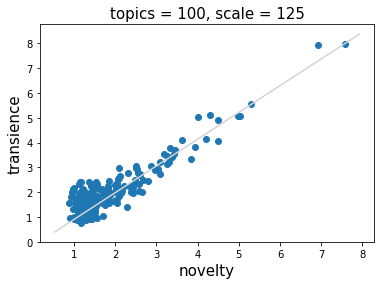

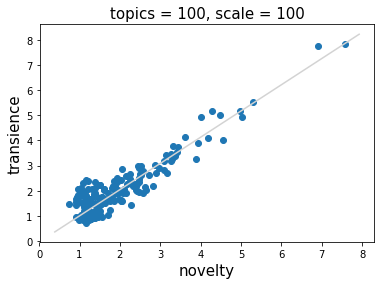

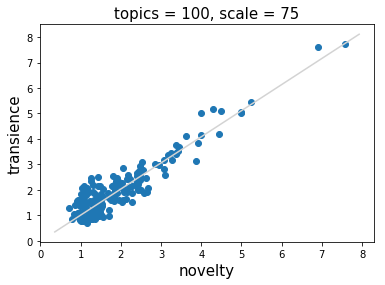

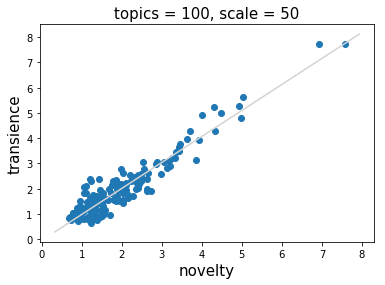

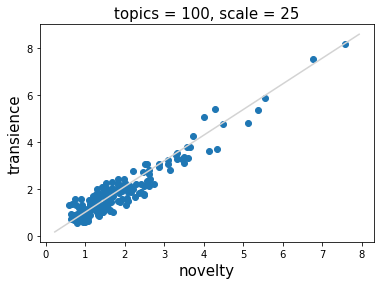

In [14]:
for idx, row in settings_df.iterrows():
    
    plot_df = df2.query(f'kld_filename == "{row.kld_filename}"')
    fig_fn = f'./plots/potus_{row.topics}_nxt_{row.Nw}_scatter.jpg'
    # Set up the plot
    
    plt.figure(figsize=(6,4))
    ##h = plt.hist2d(x=plot_df.novelty, y=plot_df.transience, bins=(100, 100), cmap=plt.get_cmap('jet_r')) #, cmap=plt.cm.jet)
    h = plt.scatter(x=plot_df.novelty, y=plot_df.transience, cmap=plt.get_cmap('jet_r')) #, cmap=plt.cm.jet)
    plt.title(f'topics = {row.topics}, scale = {row.Nw}', size = 15)
    plt.xlabel('novelty', size=15)
    plt.ylabel('transience', size=15)
    y_lim = plt.ylim()
    x_lim = plt.xlim()
    plt.plot(x_lim, y_lim, '-', color = 'lightgrey')
    #plt.colorbar(h[3])
    plt.savefig(fig_fn)
    plt.show()


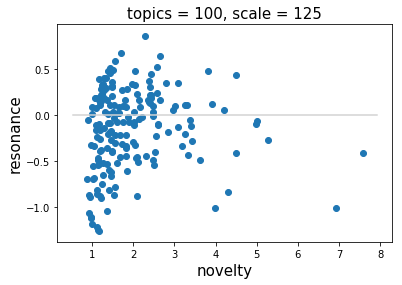

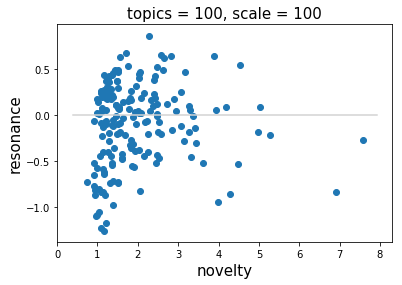

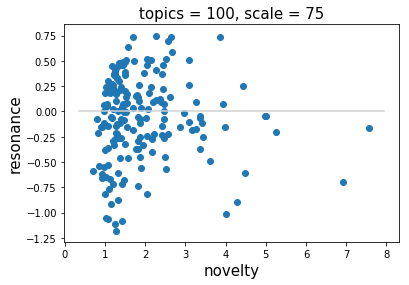

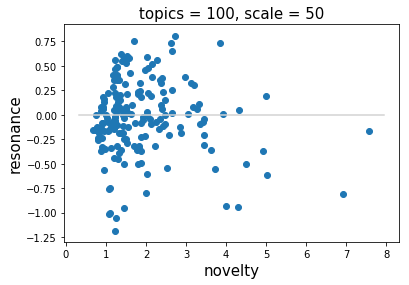

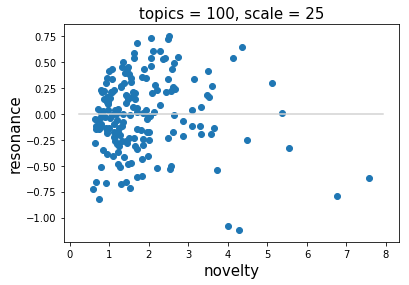

In [321]:
for idx, row in settings_df.iterrows():
    
    plot_df = df2.query(f'kld_filename == "{row.kld_filename}"')
    fig_fn = f'./plots/potus_{row.topics}_nxr_{row.Nw}_scatter.jpg'
    # Set up the plot
    plt.figure(figsize=(6,4))
    #h = plt.hist2d(x=plot_df.novelty, y=plot_df.resonance, bins=(100, 100), cmap=plt.get_cmap('jet')) #, cmap=plt.cm.jet)
    h = plt.scatter(x=plot_df.novelty, y=plot_df.resonance, cmap=plt.get_cmap('jet_r')) #, cmap=plt.cm.jet)
    
    plt.title(f'topics = {row.topics}, scale = {row.Nw}', size = 15)
    plt.xlabel('novelty', size=15)
    plt.ylabel('resonance', size=15)
    y_lim = (0,0)
    x_lim = plt.xlim()
    plt.plot(x_lim, y_lim, '-', color = 'lightgrey')
    #plt.colorbar(h[3])
    plt.savefig(fig_fn)
    plt.show()

## Density Plots

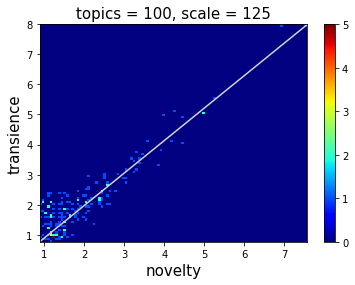

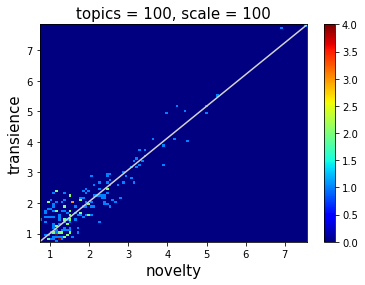

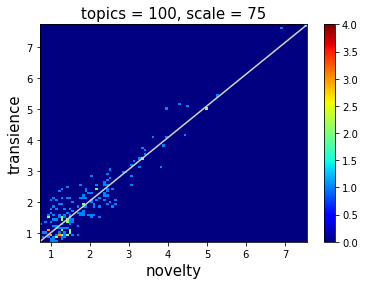

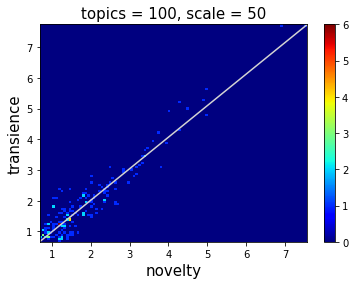

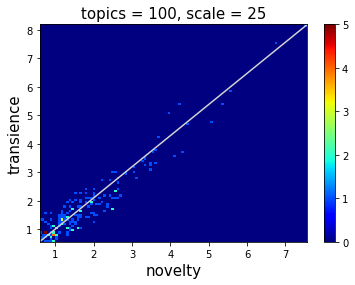

In [322]:
for idx, row in settings_df.iterrows():
    
    plot_df = df2.query(f'kld_filename == "{row.kld_filename}"')
    fig_fn = f'./plots/potus_{row.topics}_nxt_{row.Nw}_density.jpg'
    # Set up the plot
    
    plt.figure(figsize=(6,4))
    h = plt.hist2d(x=plot_df.novelty, y=plot_df.transience, bins=(100, 100), cmap=plt.get_cmap('jet')) #, cmap=plt.cm.jet)
    ##h = plt.scatter(x=plot_df.novelty, y=plot_df.transience, cmap=plt.get_cmap('jet_r')) #, cmap=plt.cm.jet)
    plt.title(f'topics = {row.topics}, scale = {row.Nw}', size = 15)
    plt.xlabel('novelty', size=15)
    plt.ylabel('transience', size=15)
    y_lim = plt.ylim()
    x_lim = plt.xlim()
    plt.plot(x_lim, y_lim, '-', color = 'lightgrey')
    plt.colorbar(h[3])
    plt.savefig(fig_fn)
    plt.show()

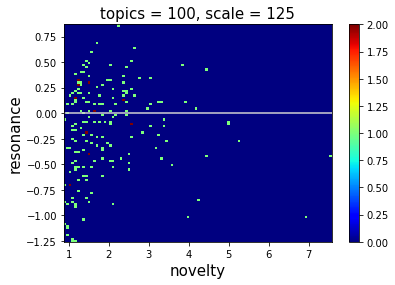

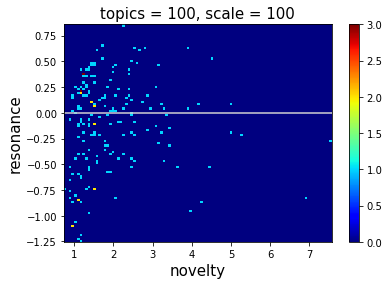

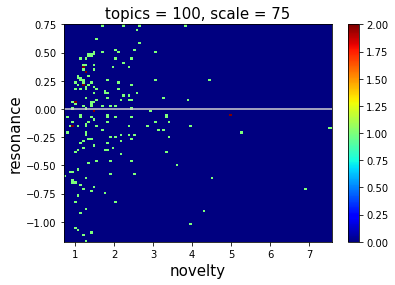

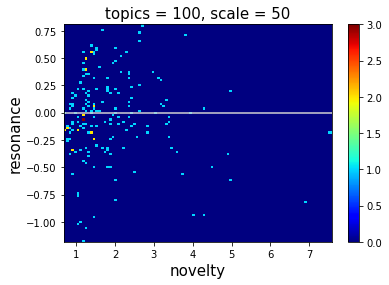

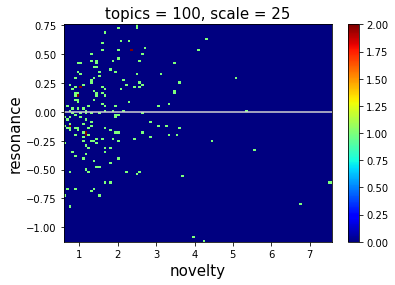

In [323]:
for idx, row in settings_df.iterrows():
    
    plot_df = df2.query(f'kld_filename == "{row.kld_filename}"')
    fig_fn = f'./plots/potus_{row.topics}_nxr_{row.Nw}_density.jpg'
    # Set up the plot
    plt.figure(figsize=(6,4))
    h = plt.hist2d(x=plot_df.novelty, y=plot_df.resonance, bins=(100, 100), cmap=plt.get_cmap('jet')) #, cmap=plt.cm.jet)
    # h = plt.scatter(x=plot_df.novelty, y=plot_df.resonance, cmap=plt.get_cmap('jet')) #, cmap=plt.cm.jet)
    
    plt.title(f'topics = {row.topics}, scale = {row.Nw}', size = 15)
    plt.xlabel('novelty', size=15)
    plt.ylabel('resonance', size=15)
    y_lim = (0,0)
    x_lim = plt.xlim()
    plt.plot(x_lim, y_lim, '-', color = 'lightgrey')
    plt.colorbar(h[3])
    plt.savefig(fig_fn)
    plt.show()